<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Image deblurring</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

## Image Deblurring
Tenemos una imagen borrosa la cual queremos hacer visible (más nítida, más bordes, etc). Mostramos otra imagen ejemplo en blanco y negro


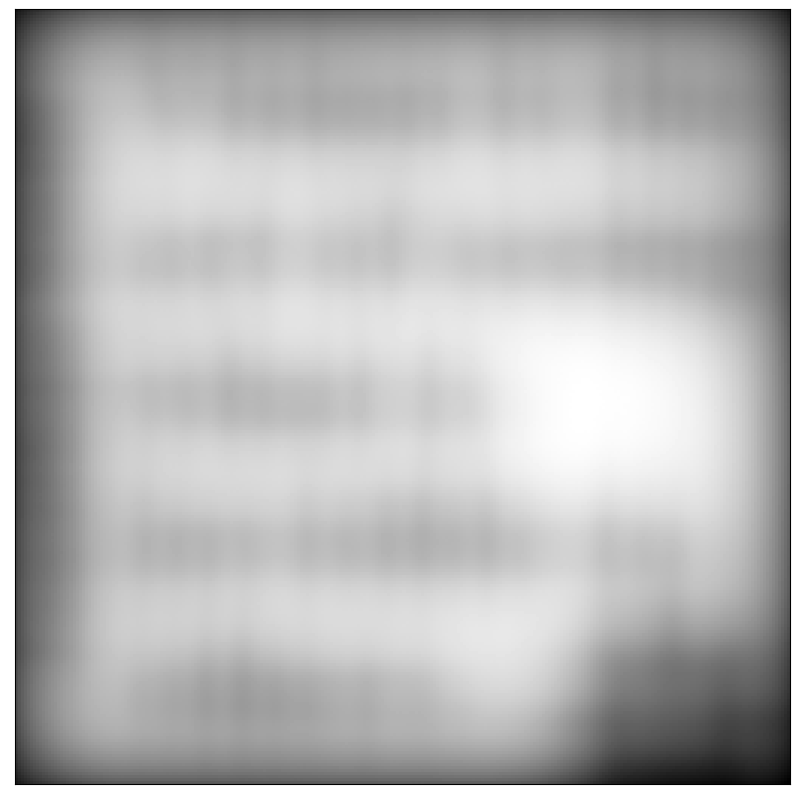

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io #Para leer archivo .mat con los filtros para deblurring y la imagen test
# !pip install opencv-python
import cv2 
data = scipy.io.loadmat('proj1data.mat')
A = data["A"]
B = data["B"]
G = data["G"]

M, N = G.shape

plt.figure(figsize=(10,18))
plt.imshow(G, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

Pensamos en este problema como volver a obtener una imagen $f$ a partir de una imagen $g$ con ruido la cual fue sujeta a una transformación $K$. Es decir, resolver para $f$ el sistema:

$$
\mathbf{K f} = \mathbf{g}
$$

donde $\mathbf{K}$ es una matriz de $n \times n$ entradas reales, y 
$\mathbf{f}$ y $\mathbf{g}$ son vectores. Este modelo representa la 
difuminación de una imagen $\mathbf{f}$ por una matriz $\mathbf{K}$ para obtener 
una medición $\mathbf{g}$. Además, vamos a suponer que $\mathbf{K}$ se encuentra 
escalada de tal forma que $\sigma_1=1$. Si su valor singular más pequeño es tal 
que $\sigma_n \approx 0$, entonces $\mathbf{K}$ se encuentra mal condicionada. 


Ahora, ¿cómo construimos $K$? Podemos crear un filtro separable en dos matrices $A, B$ tal que:

$$K = A\otimes B$$

En qué nos beneficia esto? Por que $K$ sigue siendo de $mn\times mn$. La gracia ahora es que como $K$ es resultado del producto kronecker de dos matrices, se cumple que:

$$K = U\Sigma V^* = (U_A\otimes U_B)(\Sigma_A\otimes \Sigma_B)(V_A\otimes V_B)^{*}$$

Primero, vemos que:

$$A = U_A\Sigma_A V_A^*$$

$$B = U_B\Sigma_B V_B^*$$

En este caso, tomamos $U_A, U_B$ matrices cuadradas de $m\times m$, mientras que $\Sigma_A, \Sigma_B$ son de $m\times n$. Como la imagen que usamos es cuadrada todas las matrices son iguales.


Dados $\mathbf{K}$ y $\mathbf{g}$, buscamos recuperar la imagen original 
$\mathbf{f}$. Resolver directamente el problema lineal no es buena idea, 
debido al mal condicionamiento de $\mathbf{K}$. En vez de eso, buscamos resolver 
un problema regularizado. Acá presentamos dos opciones:

## Método 1: Regularización de Tikhonov

Consiste en resolver la solución a mínimos cuadrados con la siguiente 
regularización:

$$
\min_{\mathbf{f} \in \mathbb{R}^n} \{\|\mathbf{g} - \mathbf{K f}\|_2^2 + 
\alpha^2\|\mathbf{f}\|_2^2\}
$$

Lo anterior se puede escribir como un problema de mínimos cuadrados de la 
siguiente forma (ejercicio):

$$
\min_{\mathbf{f}}\left\|\begin{bmatrix}
\mathbf{g}\\
\mathbf{0}
\end{bmatrix} - \begin{bmatrix}
\mathbf{K}\\
\alpha \mathbf{I}
\end{bmatrix} \mathbf{f}
\right\|_2^2
$$

Para resolver lo anterior, podemos notar que, si $\mathbf{K} = \mathbf{U \Sigma 
V}^T$, entonces el problema anterior se puede escribir de la siguiente 
forma (ejercicio):

$$
\min_{\hat{\mathbf{f}}} \left\|\begin{bmatrix}
\hat{\mathbf{g}}\\
\mathbf{0}
\end{bmatrix} - 
\begin{bmatrix}
\mathbf{\Sigma}\\
\alpha \mathbf{I}
\end{bmatrix} \hat{\mathbf{f}}
\right\|
$$

donde $\hat{\mathbf{f}} = \mathbf{V}^T\mathbf{f}$ y $\hat{\mathbf{g}} = 
\mathbf{U}^T\mathbf{g}$. Derive un sistema de ecuaciones que entregue la 
solución al problema anterior (ejercicio).

## Método 2: SVD truncada

Otra forma de regularizar es truncando la SVD de $\mathbf{K}$. La solución 
de 

$$
\min_{\mathbf{f}} \|\mathbf{g} - \mathbf{K f}\|_2^2
$$

se puede expresar de la siguiente forma (ejercicio):

$$
\mathbf{f}_{ls} = \sum_{i=1}^n \frac{\mathbf{u}_i^T \mathbf{g}}{\sigma_i}
\mathbf{v}_i
$$

Para regularizar la solución, es posible truncar esta suma hasta un 
término $p$:

$$
\mathbf{f}_t = \sum_{i=1}^p \frac{\mathbf{u}_i^T \mathbf{g}}{\sigma_i}
\mathbf{v}_i
$$

## Implementacion

Si se quiere encontrar directamente la SVD de $\mathbf{K}$, probablemente la 
matriz sea demasiado grande como para computarla. Para este problema, sin 
embargo, se tiene que $\mathbf{K} = \mathbf{A} \otimes \mathbf{B}$ (producto de 
Kronecker), que cuenta con la siguiente propiedad: si $\mathbf{A} = 
\mathbf{U}_A\mathbf{\Sigma}_A\mathbf{V}_{A}^T$ y $\mathbf{B} = 
\mathbf{U}_B\mathbf{\Sigma}_B\mathbf{V}_{B}^T$, entonces 

$$
\mathbf{K} = \mathbf{U\Sigma V}^T
$$

donde $\mathbf{U} = \mathbf{U}_A \otimes \mathbf{U}_B$, 
$\mathbf{\Sigma} = \mathbf{\Sigma}_A \otimes \mathbf{\Sigma}_B$ y 
$\mathbf{V} = \mathbf{V}_A \otimes \mathbf{V}_B$

Text(0.5, 1.0, 'Imagen regularizada, Tikhonov, $\\alpha = $0.0005')

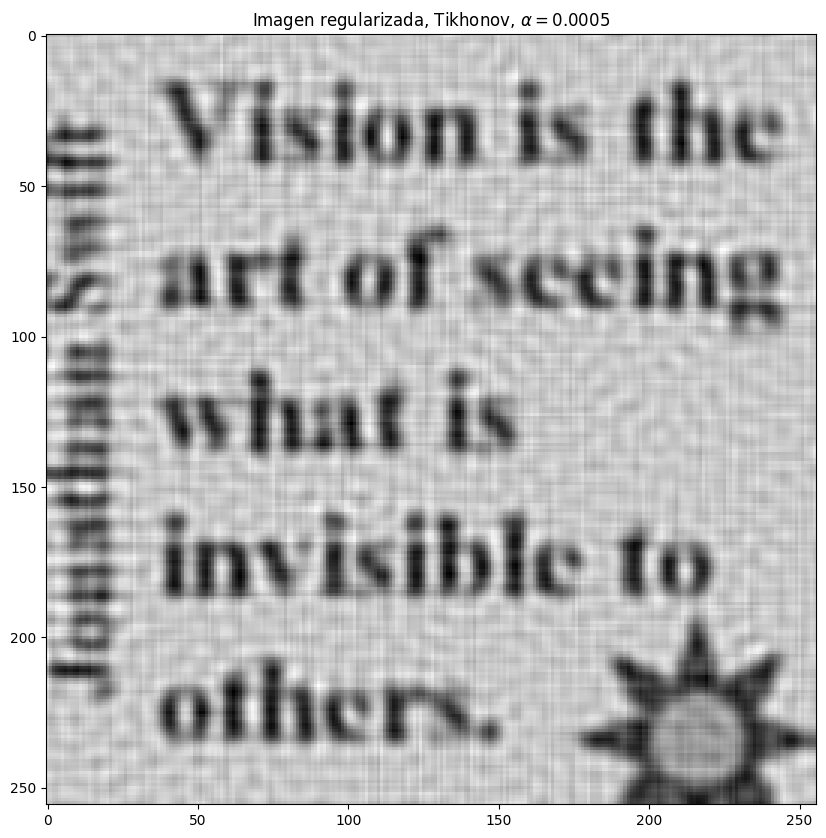

In [9]:
Ua, Sa, Va = np.linalg.svd(A)
Ub, Sb, Vb = np.linalg.svd(B)
Va = Va.T
Vb = Vb.T
Ghat = Ub.T.dot(G).dot(Ua)
S = np.outer(Sb, Sa)

# regularization parameter
alpha = 0.0005
# alpha=0.1
Fhat = (S*Ghat)/(S*S+alpha**2)
F = Vb @ Fhat @ Va.T

# plot the result
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(F, cmap="gray")
ax.set_title(fr"Imagen regularizada, Tikhonov, $\alpha = ${alpha}")

## Implementación: SVD truncada

Text(0.5, 1.0, 'Imagen regularizada, SVD truncada, p = 3000')

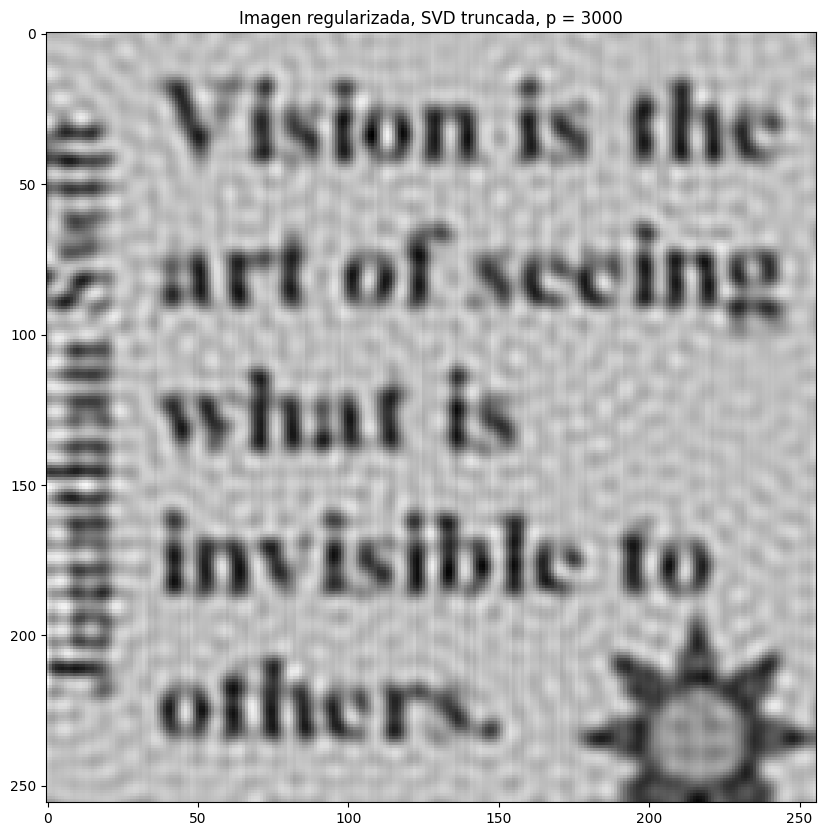

In [16]:
n, _ = Ua.shape
s = np.reshape(S, (n**2,))
sorted_idx = sorted(range(n**2), key=lambda x: s[x])
smap = sorted_idx[::-1]
ismap = sorted(range(n**2), key=lambda x: smap[x])
ss = s[smap]

p_max = 3000
ss_max = np.zeros(n**2)
ss_max[:p_max] = ss[:p_max]
Snew = np.reshape(ss_max[ismap], (n, n))
Fhat = Ghat/S
Fnew = Fhat * (Snew > 0)
F = Vb @ Fnew @ Va.T

# plot the result
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(F, cmap="gray")
ax.set_title(f"Imagen regularizada, SVD truncada, p = {p_max}")

In [ ]:
### Como blurrear una imagen con la librería
#img2 = cv2.imread("bocchi_logo.png", cv2.IMREAD_GRAYSCALE)

#blurred_img = cv2.blur(img2, (51, 51)) # Box blur
#blurred_img = cv2.GaussianBlur(img2, (101, 101), 0)
#G = blurred_img
#################